# Python for Data Analytics

## *Initialize libraries and declare functions*

In [2]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression

# increase pandas viewing area
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 200)

In [3]:
# declare function to return AVERAGE goals scored by Year and Finals status.
############################################################################
def calculate_goals_mean(df):
  grouped = df.groupby(['Year', 'Finals'])['Goals'].mean().round(2)
  result = {}
  for (year, finals), goals in grouped.items():
    if year not in result:
      result[year] = (0, 0)                             # initialise with (0, 0)
    if finals == 'Yes':
      result[year] = (goals, result[year][1])           # update Finals mean
    else:
      result[year] = (result[year][0], goals)           # update Non-Finals mean
  return dict(sorted(result.items()))

In [4]:
# declare function to return TOTAL goals scored in Finals and Non-Finals AFL games.
####################################################################################
def calculate_goals_total(df):
  grouped = df.groupby(['Year', 'Finals'])['Goals'].sum()
  result = {}
  for (year, finals), goals in grouped.items():
    if year not in result:
      result[year] = (0, 0)                             # Initialise with (0, 0)
    if finals == 'Yes':
      result[year] = (goals, result[year][1])           # Update Finals mean
    else:
      result[year] = (result[year][0], goals)           # Update Non-Finals mean
  return dict(sorted(result.items()))

## ***Task 1*** *(Load your data)*

Load your data into a ***single*** dataframe by merging the three data sets below.

- `data/afl/stats.csv"
- `data/afl/players.csv"
- `data/afl/games.csv"

*[10%]* ***Marking Criteria:*** *Your data is loaded into a single pandas dataframe that contains all the data from the original files merged together (runs without error).*

In [16]:
# import assignment dataset
stats = pd.read_csv('/workspace/IATD-Python-Data/data/afl/stats.csv')
players = pd.read_csv('/workspace/IATD-Python-Data/data/afl/players.csv')
games = pd.read_csv('/workspace/IATD-Python-Data/data/afl/games.csv')

# join datasets together into a single dataframe
df = stats.merge(players, on='playerId', how='left').merge(games, on='gameId', how='left')

# update dataframe header names
df = df.rename(columns={"year_x": "Year", "displayName_x": "player"})

# add binary feature
df["Finals"] = df['round_x'].apply(lambda x: 'Yes' if x[-1] == 'F' else 'No')

## ***Task 2*** *(Plot one player)*

- For a particular player - say "Franklin, Lance" - plot their accumlation of goals over time.

- The x-axis should be the number of games played and the y-axis should be the number of goals accumulated.

- Thus we expect to see a line that monotonically increases, but in what way will depend on the player's career.

*[30%]* ***Marking Criteria:*** 

- *Your notebook includes a chart of Lance Franklin’s goals drawn from the example data.*

- *The chart should accurately represent the progression of Lance Franklin’s goals over the data set period.*

- *Your analysis should include an enlightening explanation in Markdown blocks.*

In [17]:
# create subset of 'player' data 
Franklin_Lance  = df[df["player"].apply(lambda x: x == 'Franklin, Lance')]
Heeney_Isaac  = df[df["player"].apply(lambda x: x == 'Heeney, Isaac')]

# create a list of tuples with (gameId, date, team and position) from Franklin's played games
franklin_games = list(zip(Franklin_Lance['gameId'], Franklin_Lance['date'], Franklin_Lance['team'], Franklin_Lance['position']))

# create subset of 'player' data that are competition in the eyes of Franklin's coach.
# mask 'df' with 'franklin_games' to reveal Franklin's competition; then remove Franklin's data from this data subset.
Franklin_comp = df[df[['gameId', 'date', 'team', 'position']].apply(tuple, axis=1).isin(franklin_games)].query("player != 'Franklin, Lance'")

#### **Upon completion, I realised I had read the instruction incorrectly....**

*Please find below my assignment answer with x-axis as 'Years'*

*Subsequently however, I will re-present my assignemnt work with the x-axis assigned to 'game numbers' as requested!*

- *Sorry!*
- *Thank you!*

### **x-axis assigned to 'Years'**

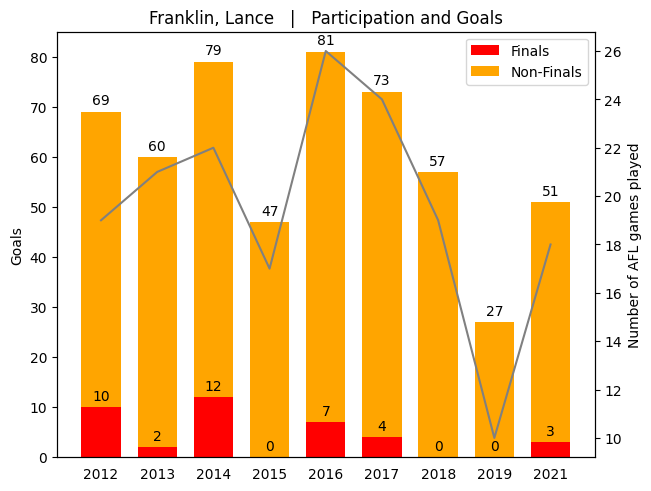

9% of games were Finals games. (16 of 176  games)
6% of total goals were scored in Finals. (38 of 544 goals)
Fraklin, Lance realised 75% of their Non-Finals goal scoring performance in Finals.

Overall Correlation (Games Played vs Goals): 0.088
Finals Correlation (Games Played vs Goals): 0.277
Non-Finals Correlation (Games Played vs Goals): 0.097

Goals Average:  3.09
Non-Finals Goals Average:  3.16
Finals Goals Average:  2.38


In [18]:
# create a chart of Franklin, Lance's annual AFL goals
Franklin_goals = calculate_goals_total(Franklin_Lance)  # create the data aggregation required for plotting

x = np.arange(len(Franklin_goals))                      # the label locations
width = 0.7                                             # Increased bar width

years = list(Franklin_goals.keys())                     # Get the years

fig, ax1 = plt.subplots(layout='constrained')

# Separate handles for years and finals status
year_handles = []
finals_handles = []

for i, (year, measurement) in enumerate(Franklin_goals.items()):
    rects1 = ax1.bar(x[i], measurement[0], width, color='red')
    rects2 = ax1.bar(x[i], measurement[1], width, bottom=measurement[0], color='orange')
    ax1.bar_label(rects1, padding=3)
    ax1.bar_label(rects2, padding=3)
    year_handles.append(rects1)                                                    # Add a handle for the year

# Manually create legend handles for finals status
finals_handles.append(plt.Rectangle((0, 0), 1, 1, fc="red"))                       # Red for Finals
finals_handles.append(plt.Rectangle((0, 0), 1, 1, fc="orange"))                    # Orange for Non-Finals

# Add some text for labels, title and custom x-axis tick labels, etc.
ax1.set_ylabel('Goals')
ax1.set_title('Franklin, Lance   |   Participation and Goals')
ax1.set_xticks(x)
ax1.set_xticklabels(years)
ax1.tick_params(axis='x', which='major', labelbottom=True, bottom=False, labeltop=False, top=False)

# Create separate legends
ax1.legend(handles=year_handles, labels=years, loc='upper left', ncol=2)
ax1.legend(handles=finals_handles, labels=['Finals', 'Non-Finals'], loc='upper right', ncol=1)

# Create a second y-axis
ax2 = ax1.twinx()

# Calculate participation rate (count of games per year)
participation = Franklin_Lance.groupby('Year')['gameId'].count()

# Plot the participation rate as a line
ax2.plot(x, participation.values, color='grey')
ax2.set_ylabel('Number of AFL games played', color='black')
ax2.tick_params(axis='y', labelcolor='black')

plt.show()

####################################################################################

# create participation statistics
participation_all = Franklin_Lance['Finals'].count()
participation_finals_yes = Franklin_Lance.query('Finals == "Yes"')['Finals'].count()
participation_finals_no = Franklin_Lance.query('Finals == "No"')['Finals'].count()


# Goals per Game (Overall, Finals, Non-Finals): Calculate Franklin's goals per game for all matches, then separately for finals and non-finals games.
# This helps understand his scoring consistency and efficiency in different match settings.
print(str(int(Franklin_Lance.query('Finals == "Yes"')['Goals'].count()/Franklin_Lance['Goals'].count()*100))+'%'
    , 'of games were Finals games.', '('+str(participation_finals_yes), 'of', participation_all, ' games)')

print(str(int(Franklin_Lance.query('Finals == "Yes"')['Goals'].sum()/Franklin_Lance['Goals'].sum()*100))+'%'
    , 'of total goals were scored in Finals.'
    , '('+str(Franklin_Lance.query('Finals == "Yes"')['Goals'].sum()), 'of', Franklin_Lance['Goals'].sum(), 'goals)')

print('Fraklin, Lance realised'
    , str(int((Franklin_Lance.query('Finals == "Yes"')['Goals'].mean() / Franklin_Lance.query('Finals == "No"')['Goals'].mean() * 100)))+'%'
    , 'of their Non-Finals goal scoring performance in Finals.')

Franklin_Lance = Franklin_Lance.copy()                                                              # Overall Correlation
Franklin_Lance['Cumulative Games Played'] = range(1, len(Franklin_Lance) + 1)
overall_correlation = Franklin_Lance['Cumulative Games Played'].corr(Franklin_Lance['Goals'])
print("\nOverall Correlation (Games Played vs Goals):", overall_correlation.round(3))

finals_df = Franklin_Lance[Franklin_Lance['Finals'] == 'Yes'].copy()                                # Correlation for Finals Games
finals_df['Cumulative Games Played'] = range(1, len(finals_df) + 1)
finals_correlation = finals_df['Cumulative Games Played'].corr(finals_df['Goals'])
print("Finals Correlation (Games Played vs Goals):", finals_correlation.round(3))

non_finals_df = Franklin_Lance[Franklin_Lance['Finals'] == 'No'].copy()                             # Correlation for Non-Finals Games
non_finals_df['Cumulative Games Played'] = range(1, len(non_finals_df) + 1)
non_finals_correlation = non_finals_df['Cumulative Games Played'].corr(non_finals_df['Goals'])
print("Non-Finals Correlation (Games Played vs Goals):", non_finals_correlation.round(3))

print('\nGoals Average: ', Franklin_Lance['Goals'].mean().round(2))
print('Non-Finals Goals Average: ', Franklin_Lance.query('Finals == "No"')['Goals'].mean().round(2))
print('Finals Goals Average: ', Franklin_Lance.query('Finals == "Yes"')['Goals'].mean().round(2))

#### *Chart commentary:*

##### Franklin, Lance goal-scoring journey across multiple seasons

Franklin, Lance plays in the Australian Football League (AFL), with a regular season and a Finals series. His goal-scoring record reveals some interesting trends across his career.

##### Non-Finals   |   (orange bars)

Franklin was particularly prolific in 2016, booting a massive 74 goals during the regular season! In addition, he consistently found thegoal posts in 2012-2014 and 2017-2018, with over 50 goals each season.

##### Finals   |   (red bars)

While the red bars may appear small, it's important to remember that finals represent **far** fewer matches than the regular season. 

- Only 16 of the 176 games shown (9%) were finals matches.
- With only 38 goals across all years shown, goals at Finals tell a different story. 

Despite strong regular season performances, Franklin's goal-scoring average in finals is noticeably lower at around 75%.

- 2.38 = Average Goals at **Finals**
- 3.16 = Average Goals at **Non-Finals**

This could be due to various factors such as:

- The increased pressure of finals.
- Facing higher-quality opposition.
- Potentially playing different roles with altered expectations.

##### Participation   |   (grey line)

The grey line illustrates the number of games Franklin played each season. Generally, more games played correlate with more goals scored, as you might expect.

Interestingly, 2019 presents an anomaly. Franklin's goal tally was relatively low, hinting at perhaps some missed games or the team's failure to reach Finals that year.

Correlation statistics suggest that the relationship between games played and goals scored is not particularly strong.

- Especially in Non-Finals matches with a correlation of just 0.097.
- Finals matches have a stronger correlation at 0.277, though this still represents a very week signal for coaches and the AFL analytics community.

This might indicate that other factors, such as opponent strength or team strategy, play a significant role in his goal-scoring output during finals.

##### Overall

Franklin displays a consistent goal-scoring ability throughout his career, especially in the regular season. 

However, his finals goal-scoring reveals a different story, suggesting that factors beyond simply playing more games influence his performance during those crucial matches.

###### *Research Suggestions*

It would be interesting to investigate whether team performance and reaching the finals impact Franklin's individual goal-scoring.

- null hypothesis 1: Making the finals positively affects Franklin's regular season goal-scoring.
- null hypothesis 2: There is a positive relationship between Franklin's goal scoring and the team's likelihood of reaching Finals.

### **x-axis assigned to 'game numbers'**

#### *Plotting of Franklin, Lance's performance over game numbers:*

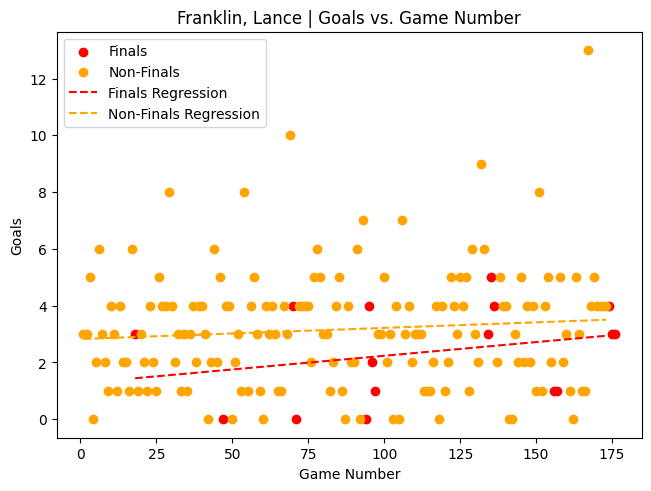

In [19]:
# create scatter plot
# Assume 'gameId' is your unique identifier for each game
Franklin_Lance.loc[:, 'Game Number'] = range(1, len(Franklin_Lance) + 1)
fig, ax1 = plt.subplots(layout='constrained')

# --- Scatter plot for Finals goals ---
finals_df = Franklin_Lance[Franklin_Lance['Finals'] == 'Yes']
ax1.scatter(finals_df['Game Number'], finals_df['Goals'], color='red', label='Finals')

# --- Scatter plot for Non-Finals goals ---
non_finals_df = Franklin_Lance[Franklin_Lance['Finals'] == 'No']
ax1.scatter(non_finals_df['Game Number'], non_finals_df['Goals'], color='orange', label='Non-Finals')

# --- Linear Regression for Finals ---
X_finals = finals_df['Game Number'].values.reshape(-1, 1)  # Reshape for LinearRegression
y_finals = finals_df['Goals']
model_finals = LinearRegression()
model_finals.fit(X_finals, y_finals)
finals_pred = model_finals.predict(X_finals)
ax1.plot(X_finals, finals_pred, color='red', linestyle='--', label='Finals Regression')

# --- Linear Regression for Non-Finals ---
X_non_finals = non_finals_df['Game Number'].values.reshape(-1, 1)  # Reshape for LinearRegression
y_non_finals = non_finals_df['Goals']
model_non_finals = LinearRegression()
model_non_finals.fit(X_non_finals, y_non_finals)
non_finals_pred = model_non_finals.predict(X_non_finals)
ax1.plot(X_non_finals, non_finals_pred, color='orange', linestyle='--', label='Non-Finals Regression')

# --- Set labels and title ---
ax1.set_ylabel('Goals')
ax1.set_xlabel('Game Number')
ax1.set_title('Franklin, Lance | Goals vs. Game Number')

# --- Add legend ---
ax1.legend()

plt.show()

#### *Plotting of Heeney, Isaac's comparative performance | Heeney is Franklin's teammate | Heeney is also in a 'Forward' position:*

/tmp/ipykernel_25372/823789473.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Heeney_Isaac.loc[:, 'Game Number'] = range(1, len(Heeney_Isaac) + 1)


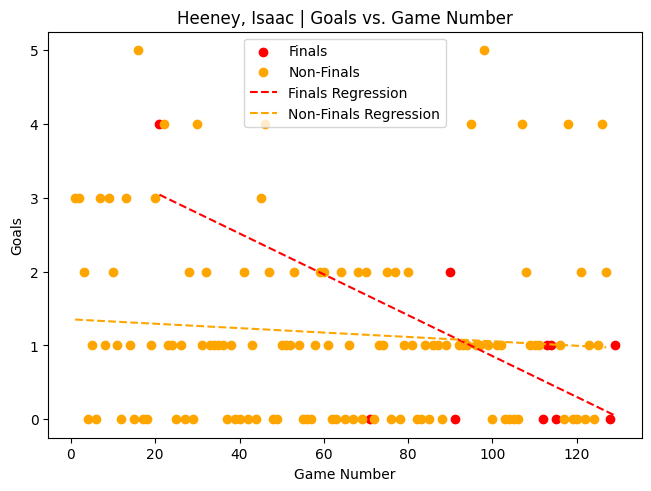

In [20]:
# Assume 'gameId' is your unique identifier for each game
Heeney_Isaac.loc[:, 'Game Number'] = range(1, len(Heeney_Isaac) + 1)

fig, ax1 = plt.subplots(layout='constrained')

# --- Scatter plot for Finals goals ---
finals_df = Heeney_Isaac[Heeney_Isaac['Finals'] == 'Yes']
ax1.scatter(finals_df['Game Number'], finals_df['Goals'], color='red', label='Finals')

# --- Scatter plot for Non-Finals goals ---
non_finals_df = Heeney_Isaac[Heeney_Isaac['Finals'] == 'No']
ax1.scatter(non_finals_df['Game Number'], non_finals_df['Goals'], color='orange', label='Non-Finals')

# --- Linear Regression for Finals ---
X_finals = finals_df['Game Number'].values.reshape(-1, 1)  # Reshape for LinearRegression
y_finals = finals_df['Goals']
model_finals = LinearRegression()
model_finals.fit(X_finals, y_finals)
finals_pred = model_finals.predict(X_finals)
ax1.plot(X_finals, finals_pred, color='red', linestyle='--', label='Finals Regression')

# --- Linear Regression for Non-Finals ---
X_non_finals = non_finals_df['Game Number'].values.reshape(-1, 1)  # Reshape for LinearRegression
y_non_finals = non_finals_df['Goals']
model_non_finals = LinearRegression()
model_non_finals.fit(X_non_finals, y_non_finals)
non_finals_pred = model_non_finals.predict(X_non_finals)
ax1.plot(X_non_finals, non_finals_pred, color='orange', linestyle='--', label='Non-Finals Regression')

# --- Set labels and title ---
ax1.set_ylabel('Goals')
ax1.set_xlabel('Game Number')
ax1.set_title('Heeney, Isaac | Goals vs. Game Number')

# --- Add legend ---
ax1.legend()

plt.show()

#### *Chart (2) commentary:*

##### Looking at the scatter plots of Franklin and Heeney's goals per game, a few key observations emerge about Franklin's performance:

- Higher overall goal-scoring: Franklin consistently scores more goals per game than Heeney, as seen by the generally higher position of his scatter points on the y-axis. This is true for both finals and non-finals matches, highlighting his superior goal-scoring ability.

- Greater variability in non-finals: In non-finals games, Franklin's scatter points are more dispersed than Heeney's, indicating a wider range of goals scored per game. This suggests that his non-finals performance can be more variable, with some games yielding very high goal tallies and others resulting in fewer goals.

- Steeper non-finals regression: While both players show a slight positive trend in non-finals goal-scoring as their careers progress, Franklin's regression line is steeper. This indicates that his non-finals goal-scoring rate has potentially increased at a faster pace compared to Heeney's.

- Contrasting finals trends: Interestingly, in finals, Franklin's regression line is relatively flat, while Heeney's shows a downward trend. This suggests that while Franklin has maintained a consistent goal-scoring average in finals throughout his career, Heeney's may be declining. This further emphasises Franklin's ability to perform consistently under pressure.

##### In summary, while Heeney provides a useful comparison, Franklin's scatter plot clearly demonstrates his greater goal-scoring prowess and consistency, particularly in high-pressure finals matches. 

- His ability to maintain a steady goal-scoring average in finals, despite the increasing game number, sets him apart.

It's important to remember that these are just some initial observations based on limited scatter plots. Further analysis, incorporating factors like opponent team and same team performance metrics, may provide a more comprehensive understanding of Franklin's performance relative to Heeney's.

## ***Task 3*** *(Plot multiple players)*

- In the one chart, plot the lines for the following players:

    - "Franklin, Lance"
    - "Papley, Tom"
    - "Mumford, Shane"
    - "Hooker, Cale"

- Plot each in a different colour so they can be distinguished and add a legend.

*[30%]* ***Marking Criteria:*** *Your notebook includes a chart of the four named player’s goals drawn from the example data. The chart should accurately represent the underlying data and be easy to interpret. Your analysis should include an enlightening explanation in Markdown blocks.*

In [21]:
# create 'Player' subsets of df data
Franklin_Lance  = df[df["player"].apply(lambda x: x == 'Franklin, Lance')]
Papley_Tom      = df[df["player"].apply(lambda x: x == 'Papley, Tom')]
Mumford_Shane   = df[df["player"].apply(lambda x: x == 'Mumford, Shane')]
Hooker_Cale     = df[df["player"].apply(lambda x: x == 'Hooker, Cale')]

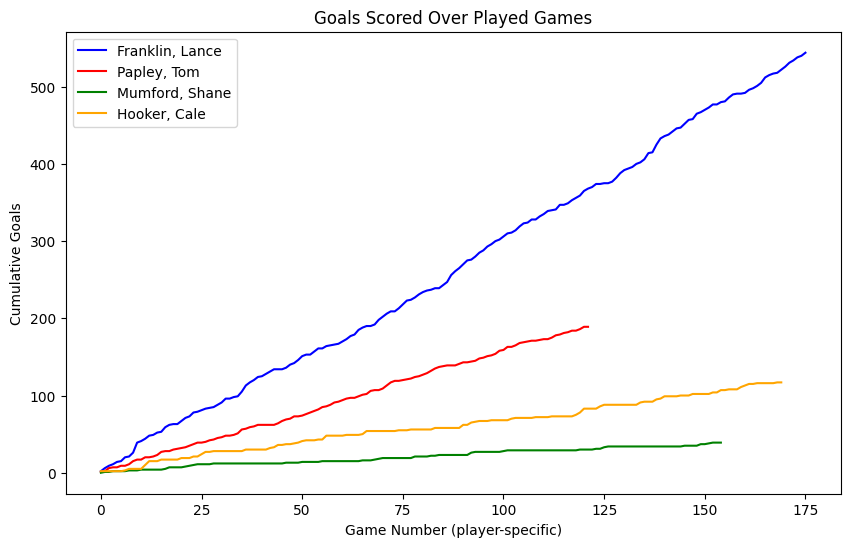

In [22]:
# Sort by 'date' and reset index for each player subset
Franklin_Lance = Franklin_Lance.sort_values(by=['date']).reset_index(drop=True)
Papley_Tom = Papley_Tom.sort_values(by=['date']).reset_index(drop=True)
Mumford_Shane = Mumford_Shane.sort_values(by=['date']).reset_index(drop=True)
Hooker_Cale = Hooker_Cale.sort_values(by=['date']).reset_index(drop=True)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the lines without markers and using the reset index
ax.plot(Franklin_Lance.index, Franklin_Lance['Goals'].cumsum(), linestyle='-', color='blue', label='Franklin, Lance')
ax.plot(Papley_Tom.index, Papley_Tom['Goals'].cumsum(), linestyle='-', color='red', label='Papley, Tom')
ax.plot(Mumford_Shane.index, Mumford_Shane['Goals'].cumsum(), linestyle='-', color='green', label='Mumford, Shane')
ax.plot(Hooker_Cale.index, Hooker_Cale['Goals'].cumsum(), linestyle='-', color='orange', label='Hooker, Cale')

# Set labels and title
ax.set_xlabel('Game Number (player-specific)')
ax.set_ylabel('Cumulative Goals')
ax.set_title('Goals Scored Over Played Games')

# Show the plot with a legend affixed
ax.legend()
plt.show()

### *Q4 explanation:*

This chart illustrates the cumulative goal-scoring records of four AFL players throughout their careers. It provides a visualisation of their scoring consistency, longevity, and relative performance.

##### *Key Observations:*

**Franklin's Dominance:** Franklin, Lance (**blue**) reigns supreme with an impressive cumulative goal tally, significantly surpassing his teammates. This underscores his exceptional scoring ability and enduring impact on the game.

**Papley's Consistency:** Papley, Tom (**red**) displays a steady upward trend, showcasing his consistent goal-scoring contributions. While not as impressive or frequent as Franklin, his consistent growth highlights his valuable role in the team.

**Mumford and Hooker's Roles:** Mumford, Shane (**green**) and Hooker, Cale (**orange**) exhibit more gradual accumulation of goals, potentially reflecting their different roles and playing styles. Both their contributions, while crucial to the team's success, may not be primarily focused on goal-scoring.

##### *Insights and Interpretations:*

**Career Trajectories:** The chart allows us to visualise the players' career trajectories, revealing periods of high scoring and potential plateaus. For instance, Franklin's steep initial rise indicates an impressive start to his career, while Papley shows a more consistent growth throughout his seasons.

**Relative Performance:** The visualisation facilitates direct comparison of the players' cumulative goal-scoring achievements. Franklin's dominance is clearly evident, but the chart also highlights the valuable contributions of his teammates, each with their own scoring patterns. For example, Hooker can be seen scoring exceptionally well but remains too inconsistent to match the performance of Papley and Franklin.

**Predictive Potential:** While this chart focuses on past performance, it can also offer hints about future trends. While there is no evidence for this functionality in this chart specifically. For example, in a different chart, it may show a recent steep increase in a player's line, suggesting improved scoring in upcoming games.

## ***Task 4*** *(Linear Regression)*

- Create a second plot showing just "Franklin, Lance" and "Hooker, Cale" but include the linear regression line for each.
- In other words, as well as showing their actual cummulative goals over time, plot their predicted goals over time where the prediction is done via Linear Regression.
- Be sure to use different colours for each line and include a legend.

*[30%]* ***Marking Criteria:*** *Your notebook includes a single chart showing the goal progression and the best fit linear regression line for the two named players. It must be easy for the reader to distinguish the data presented on the chart and interpret it with help from explanatory Markdown blocks.*

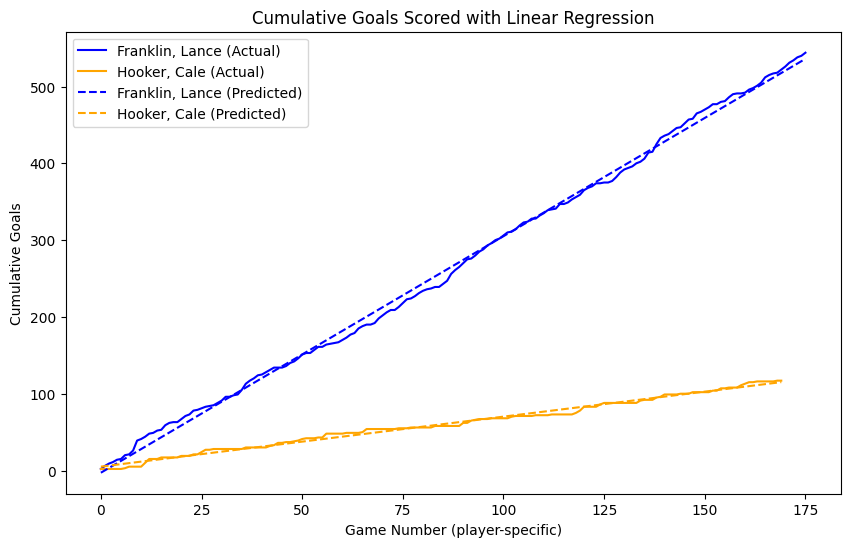

In [23]:
# --- Prepare data for Linear Regression ---
Franklin_Lance = Franklin_Lance.sort_values(by=['date']).reset_index(drop=True)
X_franklin = Franklin_Lance.index.values.reshape(-1, 1)
y_franklin = Franklin_Lance['Goals'].cumsum()

Hooker_Cale = Hooker_Cale.sort_values(by=['date']).reset_index(drop=True)
X_hooker = Hooker_Cale.index.values.reshape(-1, 1)
y_hooker = Hooker_Cale['Goals'].cumsum()

# --- Create and fit Linear Regression models ---
model_franklin = LinearRegression()
model_franklin.fit(X_franklin, y_franklin)

model_hooker = LinearRegression()
model_hooker.fit(X_hooker, y_hooker)

# --- Predict cumulative goals using the models ---
franklin_pred = model_franklin.predict(X_franklin)
hooker_pred = model_hooker.predict(X_hooker)

# --- Create the plot ---
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the actual cumulative goals
ax.plot(Franklin_Lance.index, y_franklin, linestyle='-', color='blue', label='Franklin, Lance (Actual)')
ax.plot(Hooker_Cale.index, y_hooker, linestyle='-', color='orange', label='Hooker, Cale (Actual)')

# Plot the predicted cumulative goals (linear regression)
ax.plot(Franklin_Lance.index, franklin_pred, linestyle='--', color='blue', label='Franklin, Lance (Predicted)')
ax.plot(Hooker_Cale.index, hooker_pred, linestyle='--', color='orange', label='Hooker, Cale (Predicted)')

# Set labels and title
ax.set_xlabel('Game Number (player-specific)')
ax.set_ylabel('Cumulative Goals')
ax.set_title('Cumulative Goals Scored with Linear Regression')

# Add a legend
ax.legend()

# Show the plot
plt.show()

### *Visualising Goal-Scoring Trends with Linear Regression:*

This chart provides a fascinating insight into the goal-scoring patterns of Franklin, Lance and Hooker, Cale.

#### *Key Observations:*

- **Franklin's Trend:** Franklin consistently performs with a higher-than-expected goal-scoring rate throughout his career.

- **Hooker's Trend:** Hooker's actual goal-scoring aligns more closely with his linear prediction, even more so than Franklin's consistency, suggesting Hooker more be performing more steadily and predictably.

- **Predictive Power:** The linear regression lines provide a glimpse into potential future performance. However, it's crucial to remember that these are just predictions based on past trends, and various factors could influence actual goal-scoring in the future.

#### *Chart readers can assertain that for every 100 games played, we can expect:*

- Hooker to score around 80 goals.

- Franklin to score around 300 goals!

## End of assignment

## *various unused charts and ideas*

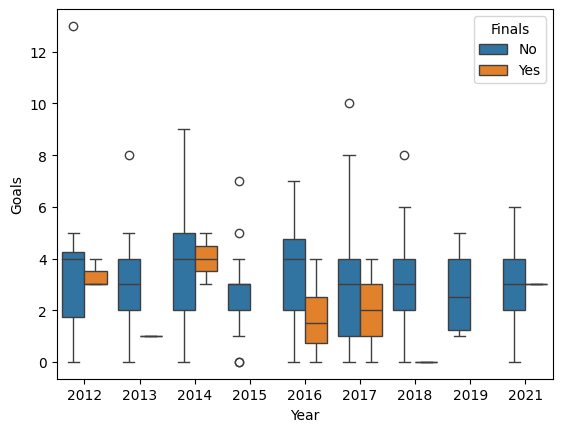

<Figure size 1000x600 with 0 Axes>

In [24]:
# boxplot performances over the years
sns.boxplot(data=Franklin_Lance, x="Year", y="Goals", hue="Finals")
plt.figure(figsize=(10, 6))
plt.show()

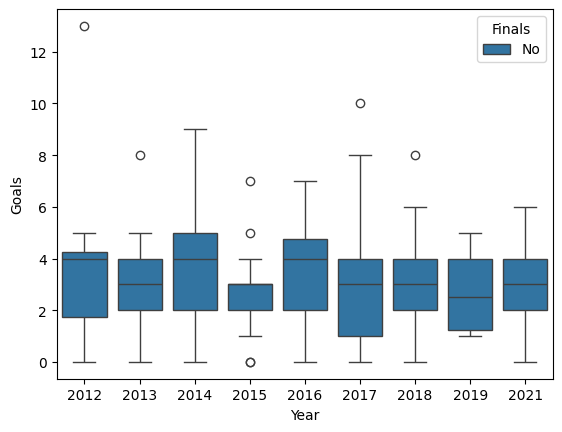

<Figure size 1000x600 with 0 Axes>

In [25]:
# plot
tmp = Franklin_Lance.query("Finals == 'No'")
sns.boxplot(data=tmp, x="Year", y="Goals", hue="Finals")
plt.figure(figsize=(10, 6))
plt.show()

### unused ideas

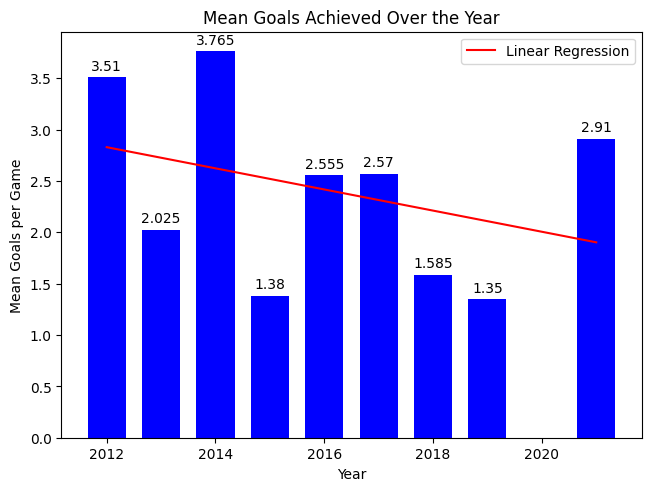

In [26]:
# Calculate the overall mean goals per year
overall_mean_goals = {year: np.mean(goals) for year, goals in calculate_goals_mean(Franklin_Lance).items()}

x = np.array(list(overall_mean_goals.keys())).reshape(-1, 1)  # Reshape for linear regression
y = np.array(list(overall_mean_goals.values()))

# Create linear regression model
model = LinearRegression()
model.fit(x, y)

# Predict y values using the model
y_pred = model.predict(x)

fig, ax = plt.subplots(layout='constrained')

# Plot the bar chart
ax.bar(x.flatten(), y, color='blue', width=0.7)
ax.bar_label(ax.containers[0], padding=3) 

# Plot the linear regression line
ax.plot(x, y_pred, color='red', label='Linear Regression')

# Add labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Mean Goals per Game')
ax.set_title('Mean Goals Achieved Over the Year')

# Add legend
ax.legend()

plt.show()

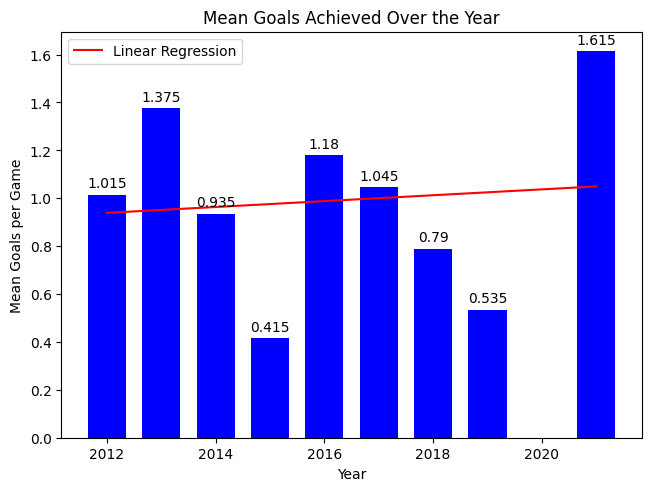

In [27]:
# Calculate the overall mean goals per year
overall_mean_goals = {year: np.mean(goals) for year, goals in calculate_goals_mean(Franklin_comp).items()}

x = np.array(list(overall_mean_goals.keys())).reshape(-1, 1)  # Reshape for linear regression
y = np.array(list(overall_mean_goals.values()))

# Create linear regression model
model = LinearRegression()
model.fit(x, y)

# Predict y values using the model
y_pred = model.predict(x)

fig, ax = plt.subplots(layout='constrained')

# Plot the bar chart
ax.bar(x.flatten(), y, color='blue', width=0.7)
ax.bar_label(ax.containers[0], padding=3) 

# Plot the linear regression line
ax.plot(x, y_pred, color='red', label='Linear Regression')

# Add labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Mean Goals per Game')
ax.set_title('Mean Goals Achieved Over the Year')

# Add legend
ax.legend()

plt.show()


In [28]:
years = list(Franklin_goals_mean.keys())  # Get the years
x = np.array(years).reshape(-1, 1)  # Use years for x-axis values

width = 0.35  # the width of the bars

fig, ax = plt.subplots(layout='constrained')

# Prepare data for linear regression
y_reg_finals = np.array([val[0] for val in Franklin_goals_mean.values()])
y_reg_non_finals = np.array([val[1] for val in Franklin_goals_mean.values()])

# Create and fit linear regression models for Finals and Non-Finals
model_finals = LinearRegression()
model_finals.fit(x, y_reg_finals)
model_non_finals = LinearRegression()
model_non_finals.fit(x, y_reg_non_finals)

for i, (year, measurement) in enumerate(Franklin_goals_mean.items()):
    rects1 = ax.bar(x[i] - width/2, measurement[0], width, color='red', label='Finals' if i == 0 else "") 
    rects2 = ax.bar(x[i] + width/2, measurement[1], width, color='orange', label='Non-Finals' if i == 0 else "")
    ax.bar_label(rects1, padding=3)
    ax.bar_label(rects2, padding=3)

# Plot the linear regression lines
ax.plot(x, model_finals.predict(x), color='darkred', label='Finals Regression')
ax.plot(x, model_non_finals.predict(x), color='darkorange', label='Non-Finals Regression')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Mean goals per game')
ax.set_title('Mean goals achieved over the year')
ax.set_xticks(x.flatten())  # Set x-ticks to the years
ax.set_xticklabels(years)
ax.tick_params(axis='x', which='major', labelbottom=True, bottom=False, labeltop=False, top=False)

# Add legend (only once)
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))  # Remove duplicate labels
ax.legend(by_label.values(), by_label.keys(), loc='upper right')

plt.show()

NameError: name 'Franklin_goals_mean' is not defined

In [ ]:
# create split bar chart with average line (dotted)
years = list(calculate_goals_mean.keys())  # Get the years
x = np.array(years).reshape(-1, 1)  # Use years for x-axis values
width = 0.35  # the width of the bars

fig, ax = plt.subplots(layout='constrained')

# Calculate the overall mean goals for Finals and Non-Finals
finals_means = [val[0] for val in Franklin_goals_mean.values()]
non_finals_means = [val[1] for val in Franklin_goals_mean.values()]
mean_finals = np.mean(finals_means)
mean_non_finals = np.mean(non_finals_means)

for i, (year, measurement) in enumerate(Franklin_goals_mean.items()):
    rects1 = ax.bar(x[i] - width/2, measurement[0], width, color='red', label='Finals' if i == 0 else "")
    rects2 = ax.bar(x[i] + width/2, measurement[1], width, color='orange', label='Non-Finals' if i == 0 else "")
    ax.bar_label(rects1, padding=3)
    ax.bar_label(rects2, padding=3)

# Plot the mean lines
ax.axhline(y=mean_finals, color='darkred', linestyle='--', label='Mean Finals Goals')
ax.axhline(y=mean_non_finals, color='darkorange', linestyle='--', label='Mean Non-Finals Goals')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Mean goals per game')
ax.set_title('Mean goals achieved over the year')
ax.set_xticks(x.flatten())  # Set x-ticks to the years
ax.set_xticklabels(years)
ax.tick_params(axis='x', which='major', labelbottom=True, bottom=False, labeltop=False, top=False)

# Add legend (only once)
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), loc='upper right')

plt.show()

AttributeError: 'function' object has no attribute 'keys'

Average goals achieved in NON-FINALS: 3.1625
Average goals achieved in FINALS: 2.375


<Axes: xlabel='Year', ylabel='[Finals] Goals'>

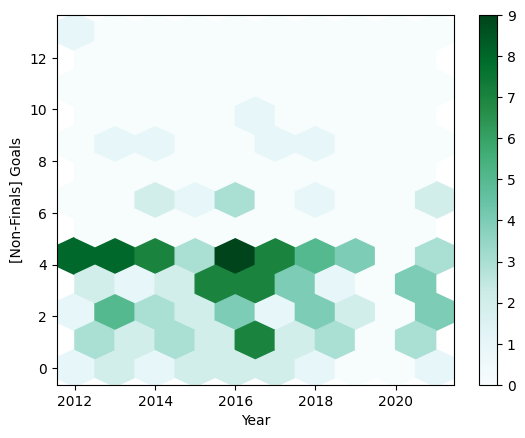

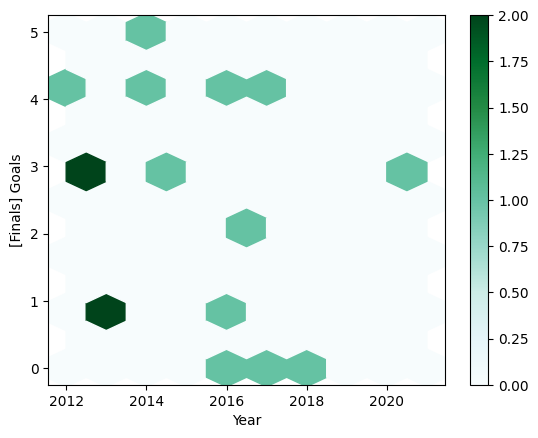

In [ ]:
print('Average goals achieved in NON-FINALS:', Franklin_Lance.query("Finals == 'No'" )['Goals'].mean())
print('Average goals achieved in FINALS:',     Franklin_Lance.query("Finals == 'Yes'")['Goals'].mean())

Franklin_Lance.query("Finals == 'No'").plot( kind = "hexbin", x = "Year", y = "Goals", gridsize = (9, 6), ylabel = '[Non-Finals] Goals')
Franklin_Lance.query("Finals == 'Yes'").plot(kind = "hexbin", x = "Year", y = "Goals", gridsize = (9, 6), ylabel = '[Finals] Goals')

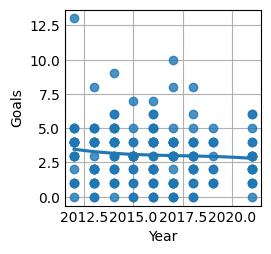

In [ ]:
# create scatterplot with regression line
sns.regplot(Franklin_Lance, x='Year', y='Goals', order=3, ci=None)
plt.show()

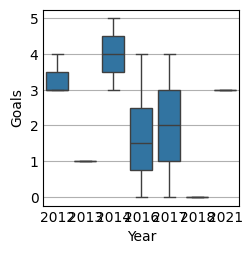

<Figure size 1000x600 with 0 Axes>

In [ ]:
# plot
tmp = Franklin_Lance.query("Finals == 'Yes'")
sns.boxplot(data=tmp, x="Year", y="Goals", hue="Finals")
plt.figure(figsize=(10, 6))
plt.show()

In [ ]:
# sns.distplot(Franklin_Lance['Year'])
# sns.distplot(Franklin_Lance['Goals']);
# sns.kdeplot(Franklin_Lance[["Goals"]]);
# sns.pairplot(Franklin_Lance, hue='Finals', height=2.5);

```python
literacy = pandas.read_csv("data/female_literacy.csv") # reading in data
literacy = literacy.dropna() # Fixing data
d = numpy.polyfit(literacy["year"], literacy["literacy"], 1) # generating coefficients
f = numpy.poly1d(d) # Create the "formula" function using the coefficients
literacy["prediction"] = f(literacy["year"]) # Applying our formula to generate predictions for all years
canvas = literacy.plot(kind="scatter", x="year", y="literacy") # plotting the original year vs literacy rate
literacy.plot(kind="line", x="year", y="prediction", ax=canvas, color="red") # plotting the year vs predicted literacy
```

In [ ]:
# !curl -O 
data = pd.read_csv('https://raw.githubusercontent.com/jakevdp/marathon-data/master/marathon-data.csv')

In [ ]:
def convert_time(s):
    h, m, s = map(int, s.split(':'))
    return pd.datetools.timedelta(hours=h, minutes=m, seconds=s)

data = pd.read_csv('marathon-data.csv',
                   converters={'split':convert_time, 'final':convert_time})

In [ ]:
data['split_sec'] = data['split'].astype(int) / 1E9
data['final_sec'] = data['final'].astype(int) / 1E9

In [ ]:
with sns.axes_style('white'):
    g = sns.jointplot("split_sec", "final_sec", data, kind='hex')
    g.ax_joint.plot(np.linspace(4000, 16000),
                    np.linspace(8000, 32000), ':k')

In [ ]:
data['split_frac'] = 1 - 2 * data['split_sec'] / data['final_sec']

In [ ]:

sns.distplot(data['split_frac'], kde=False);
plt.axvline(0, color="k", linestyle="--");

In [ ]:
g = sns.PairGrid(data, vars=['age', 'split_sec', 'final_sec', 'split_frac'],
                 hue='gender', palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend();

In [ ]:
sns.kdeplot(data.split_frac[data.gender=='M'], label='men', shade=True)
sns.kdeplot(data.split_frac[data.gender=='W'], label='women', shade=True)
plt.xlabel('split_frac');

In [ ]:
sns.violinplot("gender", "split_frac", data=data,
               palette=["lightblue", "lightpink"]);

In [ ]:
data['age_dec'] = data.age.map(lambda age: 10 * (age // 10))

In [ ]:
men = (data.gender == 'M')
women = (data.gender == 'W')

with sns.axes_style(style=None):
    sns.violinplot("age_dec", "split_frac", hue="gender", data=data,
                   split=True, inner="quartile",
                   palette=["lightblue", "lightpink"]);

In [ ]:
g = sns.lmplot('final_sec', 'split_frac', col='gender', data=data,
               markers=".", scatter_kws=dict(color='c'))
g.map(plt.axhline, y=0.1, color="k", ls=":");

In [ ]:
planets = sns.load_dataset('planets')
with sns.axes_style('white'):
    g = sns.factorplot("year", data=planets, aspect=2,
                       kind="count", color='steelblue')
    g.set_xticklabels(step=5)

In [ ]:
with sns.axes_style('white'):
    g = sns.factorplot("year", data=planets, aspect=4.0, kind='count',
                       hue='method', order=range(2001, 2015))
    g.set_ylabels('Number of Planets Discovered')

In [ ]:
sns.jointplot("total_bill", "tip", data=tips, kind='reg');

In [ ]:
with sns.axes_style('white'):
    sns.jointplot("total_bill", "tip", data=tips, kind='hex')

In [ ]:
with sns.axes_style(style='ticks'):
    g = sns.factorplot("day", "total_bill", "sex", data=tips, kind="box")
    g.set_axis_labels("Day", "Total Bill");

In [ ]:
tips = sns.load_dataset('tips')

tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']

grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
grid.map(plt.hist, "tip_pct", bins=np.linspace(0, 40, 15));

In [ ]:
# create 'Player' subsets of df data
Franklin_Lance  = df[df["player"].apply(lambda x: x == 'Franklin, Lance')]
Papley_Tom      = df[df["player"].apply(lambda x: x == 'Papley, Tom')]
Mumford_Shane   = df[df["player"].apply(lambda x: x == 'Mumford, Shane')]
Hooker_Cale     = df[df["player"].apply(lambda x: x == 'Hooker, Cale')]

In [ ]:
# example of additive scatter plotting!
# where "existing_plot" is the first plot and the following two lines of code are the two additional classes!

just_setosa = iris["class"] == "Iris-setosa"
just_versicolor = iris["class"] == "Iris-versicolor"
just_virginica = iris["class"] == "Iris-virginica"

existing_plot = iris[just_setosa].plot(kind="scatter", color="Red", x="sepal length", y="sepal width", label="setosa")
iris[just_versicolor].plot(kind="scatter", color="Blue", x="sepal length", y="sepal width", ax=existing_plot, label="versicolor")
iris[just_virginica].plot(kind="scatter", color="Green", x="sepal length", y="sepal width", ax=existing_plot, label="virginica")